In [1]:
import os
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.models as models

import cv2

from utils import read_image, split_data, create_triplets
from tqdm import tqdm

from dataset.face_triplet_dataset import FaceTripletDataset

In [2]:
# Set random seed
# Setting random seeds to enable consistency while testing.
random.seed(5)
np.random.seed(5)
torch.manual_seed(5)

In [3]:
working_dir  = os.getcwd()
dataset_dir = os.path.join(working_dir, 'dataset')

# Printing the list of directories in the data folder
for dir in os.listdir(dataset_dir):
    print(f"Directory: {dir}")

# Printing all the files inside each of the dataset folder
# for dir, _, filenames in os.walk(dataset_dir):
#     for filename in filenames:
#         print(f"file: {os.path.join(dir, filename)}")


extracted_faces_dir = os.path.join(dataset_dir, 'extracted_faces')
print(f"Extracted Faces dir: {extracted_faces_dir}")

Directory: .DS_Store
Directory: extracted_faces
Directory: face_dataset
Directory: __pycache__
Directory: .ipynb_checkpoints
Directory: face_triplet_dataset.py
Extracted Faces dir: /Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces


In [4]:
train_set, test_set = split_data(extracted_faces_dir)

print(f"train_set: {len(train_set)}")
print(f"test_set: {len(test_set)}")

for key in train_set.keys():
    print(f"train_folder : {key} no. samples: {train_set[key]}")

train_set: 1191
test_set: 132
train_folder : 789 no. samples: 2
train_folder : 1063 no. samples: 3
train_folder : 579 no. samples: 5
train_folder : 1348 no. samples: 2
train_folder : 626 no. samples: 2
train_folder : 1418 no. samples: 2
train_folder : 118 no. samples: 2
train_folder : 1076 no. samples: 4
train_folder : 287 no. samples: 2
train_folder : 1342 no. samples: 6
train_folder : 373 no. samples: 6
train_folder : 860 no. samples: 2
train_folder : 1250 no. samples: 3
train_folder : 1256 no. samples: 8
train_folder : 1671 no. samples: 4
train_folder : 1403 no. samples: 2
train_folder : 1603 no. samples: 2
train_folder : 1677 no. samples: 3
train_folder : 996 no. samples: 2
train_folder : 1439 no. samples: 3
train_folder : 200 no. samples: 2
train_folder : 927 no. samples: 2
train_folder : 805 no. samples: 2
train_folder : 89 no. samples: 18
train_folder : 835 no. samples: 3
train_folder : 456 no. samples: 2
train_folder : 83 no. samples: 20
train_folder : 436 no. samples: 2
train_

In [5]:
train_triplets = create_triplets(extracted_faces_dir, train_set)
test_triplets = create_triplets(extracted_faces_dir, test_set)

data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])


triplet_dataset = FaceTripletDataset(triplets=train_triplets, transform=data_transform)

print("Number of training triplets:", len(train_triplets))
print("Number of testing triplets :", len(test_triplets))

print("\nExamples of train_triplets:")
for i in range(5):
    print(train_triplets[i])


print("\nExamples of test_triplets:")
for i in range(5):
    print(test_triplets[i])

batch.shape: (9828, 3, 128, 128, 3)
Number of training triplets: 9828
Number of testing triplets : 1400

Examples of train_triplets:
(('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/1333', '2.jpg'), ('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/1333', '5.jpg'), ('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/1615', '3.jpg'))
(('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/868', '2.jpg'), ('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/868', '6.jpg'), ('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/392', '0.jpg'))
(('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/1269', '1.jpg'), ('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/1269', '2.jpg'), ('/Users/user/Documents/Python/kaggle/facial_recognition/dataset/extracted_faces/27

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

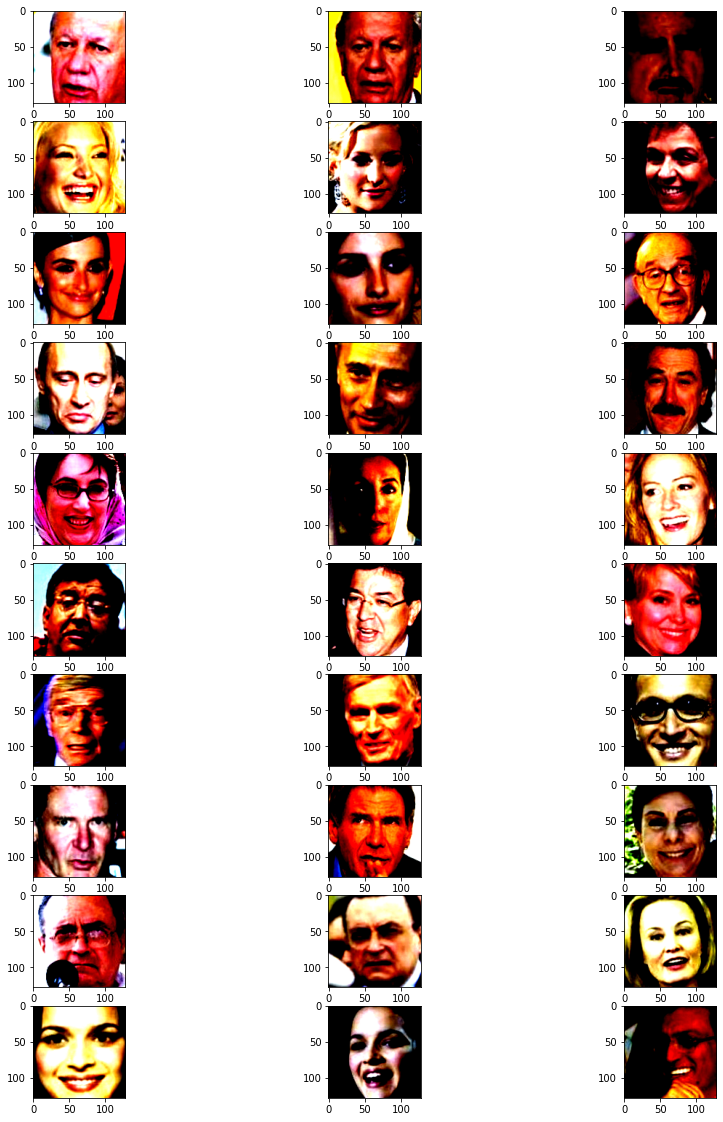

In [6]:
# Plot the data
num_plots = 10
f, axes = plt.subplots(num_plots, 3, figsize=(15, 20))

for i, sample in enumerate(triplet_dataset):
    axes[i, 0].imshow(sample['anchor'].permute(1, 2, 0).detach().numpy())
    axes[i, 1].imshow(sample['positive'].permute(1, 2, 0).detach().numpy())
    axes[i, 2].imshow(sample['negative'].permute(1, 2, 0).detach().numpy())
    if i == num_plots - 1:
        plt.show()
        break

In [ ]:
def train(siamese_network, dataloader, optimizer, epoch):
    for i in range(epoch):
        total_loss = 0.00
        siamese_network.train()
        print(f"------------------------- Epoch {i} -------------------------")
        for j, sample_batched in enumerate(dataloader):
            anchor_batch, positive_batch, negative_batch = sample_batched['anchor'], sample_batched['positive'], sample_batched['negative']
            anchor_embeddings, positive_embeddings, negative_embeddings = siamese_network(anchor_batch, positive_batch, negative_batch)
            anchor_positive_distance = F.pairwise_distance(anchor_embeddings, positive_embeddings, 2)
            anchor_negative_distance = F.pairwise_distance(anchor_embeddings, negative_embeddings, 2)
            triplet_loss = torch.sum(torch.max(torch.zeros_like(anchor_positive_distance), anchor_positive_distance - anchor_negative_distance + siamese_network.margin))

            total_loss += triplet_loss

            optimizer.zero_grad()
            triplet_loss.backward()
            optimizer.step()
        
        average_total_loss = total_loss / len(dataloader)
        print(f"Average Training Loss per epoch: {average_total_loss}")

def test(siamese_network, test_dataloader):
    pos_scores, neg_scores = [], []

    for i, sample in enumerate(test_dataloader):
        anchor_batch, positive_batch, negative_batch = sample['anchor'], sample['positive'], sample['negative']
        anchor_embeddings, positive_embeddings, negative_embeddings = siamese_network(anchor_batch, positive_batch, negative_batch)
        anchor_positive_distance = F.pairwise_distance(anchor_embeddings, positive_embeddings, 2)
        anchor_negative_distance = F.pairwise_distance(anchor_embeddings, negative_embeddings, 2)

        pos_scores.append(anchor_positive_distance.detach().numpy())

        neg_scores.append(anchor_negative_distance.detach().numpy())

    accuracy = np.sum(np.all(pos_scores < neg_scores, axis = 1)) / len(anchor_positive_distance)
    pos_scores_mean, pose_scores_std   = np.mean(np.array(pos_scores)), np.std(np.array(pos_scores))
    neg_scores_mean, neg_scores_std = np.mean(np.array(neg_scores)), np.std(np.array(neg_scores))

    print(f"Average Training Loss per epoch: {accuracy}")
    print(f"Positive Score:  mean: {pos_scores_mean}, std: {pose_scores_std}")
    print(f"Negative Score:  mean: {neg_scores_mean}, std: {neg_scores_std}")

In [11]:
from model.siamese_network import SiameseNetwork
sample = torch.randn(10, 3, 224, 224)

print(f"sample shape: {sample.shape}")
    
siamese_network = SiameseNetwork(embeddings_dim= 128, margin=0.2)
out = siamese_network.forward_once(sample)


sample shape: torch.Size([10, 3, 224, 224])


In [12]:
num_epochs = 10
batch_size = 128

train_dataloader = DataLoader(triplet_dataset, batch_size= batch_size,
                        shuffle=True, num_workers=0)
    
siamese_network = SiameseNetwork(embeddings_dim = 128, margin = 0.2)

optimizer = torch.optim.Adam(siamese_network.parameters(), lr=0.0001)

train(siamese_network, train_dataloader, optimizer, num_epochs)


------------------------- Epoch 0 -------------------------
Average Training Loss per epoch: 26.79436683654785
------------------------- Epoch 1 -------------------------
Average Training Loss per epoch: 17.083288192749023
------------------------- Epoch 2 -------------------------
Average Training Loss per epoch: 12.518519401550293
------------------------- Epoch 3 -------------------------
Average Training Loss per epoch: 9.65237808227539
------------------------- Epoch 4 -------------------------
Average Training Loss per epoch: 7.446014881134033
------------------------- Epoch 5 -------------------------
Average Training Loss per epoch: 5.8265299797058105
------------------------- Epoch 6 -------------------------
Average Training Loss per epoch: 4.6568603515625
------------------------- Epoch 7 -------------------------
Average Training Loss per epoch: 3.5291240215301514
------------------------- Epoch 8 -------------------------
Average Training Loss per epoch: 2.8268353939056396

In [14]:
model_path = os.path.join(working_dir, "model", "weights", "siamese_net_version_1.pt")

torch.save(siamese_network.state_dict(), model_path)
siamese_network.load_state_dict(torch.load(model_path))
siamese_network.eval()

SiameseNetwork(
  (pretrained_resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [67]:
test_triplet_dataset = FaceTripletDataset(triplets=test_triplets, transform=data_transform)
test_dataloader = DataLoader(test_triplet_dataset, batch_size= batch_size,
                        shuffle=False, num_workers=0)
test(siamese_network, test_dataloader)

batch.shape: (1400, 3, 128, 128, 3)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Inference

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


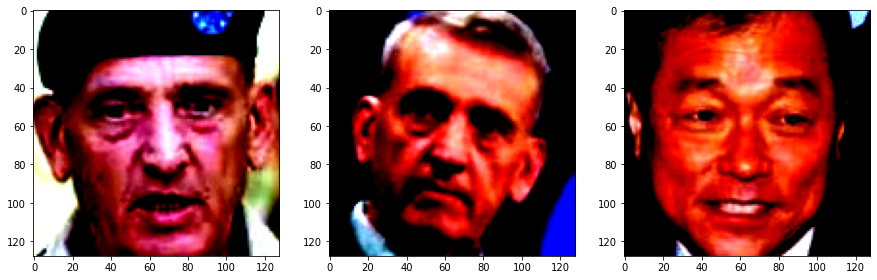

Similarity Score: tensor([[2.6484]], grad_fn=<CdistBackward0>)
This is not the same person


In [62]:
def check_similarity(model, source_img, dst_img):
    source_embeddings = model.forward_once(source_img)
    dst_embeddings = model.forward_once(dst_img)
    similarity_score = torch.cdist(source_embeddings, dst_embeddings, 2)
    return similarity_score

image_1 = triplet_dataset[100]["anchor"]
image_2 = triplet_dataset[100]["positive"]
image_3 = triplet_dataset[100]["negative"]

f, axes = plt.subplots(1, 3, figsize=(15, 20))
axes[0].imshow(image_1.permute(1, 2, 0).detach().numpy())
axes[1].imshow(image_2.permute(1, 2, 0).detach().numpy())
axes[2].imshow(image_3.permute(1, 2, 0).detach().numpy())
plt.show()

threshold = 2.30
similarity_score = check_similarity(siamese_network, image_1.unsqueeze(0), image_3.unsqueeze(0))
print(f"Similarity Score: {similarity_score}")
if similarity_score > threshold:
    print("This is not the same person")
elif similarity_score <= threshold:
    print("This is the same persoon")

### Saving & Loading a General Checkpoint for Inference and/or Resuming Training

In [ ]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            ...
            }, PATH)

model = TheModelClass(*args, **kwargs)
optimizer = TheOptimizerClass(*args, **kwargs)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
# - or -
model.train()